# Capstone Project: "Transforming Neighborhoods by Predicting Crime Outcomes in the UK
# Name: Marina Mnoyan
# Contact: marina.mnoyan@gmail.com
# Date: July 4, 2022
# Project Purpose:
Help policymakers to identify and address the factors that influence whether crimes are solved. The main dataset was downloaded from the UK Police Department website. Additional datasets were acquired from various UK Government sources in order to provide neighborhood-level characteristics. 


# Project Framework & Deliverables

    1. Data Acquisition, pre-processing with MS Excel & Git Bash       MS Excel, Git Bash (details in the ReadMe text file)         2. Main dataset Wrangling, Processing & Cleaning                   Jupyter Notebook 1     
    3. Additional dataset Merging, Wrangling, Processing & Cleaning    Jupyter Notebook 2     <== current notebook
    4. Exploratory Data Analysis & Visualizations                      Jupyter Notebook 3
                                                                       Tableau File
    5. Feature Engineering                                             Jupyter Notebook 4
    6. Modeling & Evaluation                                           Jupyter Notebook 5
    7. Findings & Recommendations                                      PDF Business Report
                                                                       PDF Presentation
    8. Additional Information including links to original data         ReadMe text file

# Jupyter Notebook 2 of 5: Additional dataset Merging, Wrangling, Processing & Cleaning

Steps:

[1) Main Dataset Reading and Basic Checks](#1) 

[2) Cleaning & Merging Additional Datasets](#2)
* [2a) Age & Gender](#2a)
* [2b) Households without Cars](#2b)
* [2c) Deprivation Index](#2c)
* [2d) Job Seeker Allowance](#2d)
* [2e) Free School Meal Allowance Ages 11-15](#2e)
* [2f) Free School Meal Allowance Ages 5-10](#2f)
* [2g) Ethnicity](#2g)
* [2h) Population Density](#2h)
* [2i) Median House Price](#2i)
* [2j) Median Age](#2j)
* [2k) Religion](#2k)


[3) CSV output](#3)

<a id='1'></a>
## 1) Main Dataset Reading and Basic Checks

First, we will import basic packages that will help with this notebook:

In [1]:
# Import basic data science packages
import numpy as np
import pandas as pd

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

Then we need to make CSV files readable for Jupyter Notebook. We will import the file created at the end of Jupyter Notebook 1. As a reminder, it contains cleaned Main dataset containing crime:

In [2]:
# Importing the CSV file
df_crime = pd.read_csv('data/df_crime.csv', index_col=False)

Let's perform some very basic checks to make sure everything was imported properly:

In [3]:
# Checking the first 5 rows of the dataset
df_crime.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category
0,1,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable
1,1,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
2,1,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
3,1,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect
4,1,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect


In [4]:
# Checking the size of the dataset
df_crime.shape

(4580733, 8)

Everything looks great so we can proceed to looking at additional datasets that we would like to merge with our Main dataset.

<a id='2'></a>
## 2) Cleaning & Merging Additional Datasets

<a id='2a'></a>
### 2a) Age & Gender

First, let's import the CSV dataset into a dataframe: 

In [5]:
# Importing the dataset
df_age = pd.read_csv('data/2020age.csv')

Then let's perform some basic checks:

In [6]:
# Take a look at the first 5 rows
df_age.head()

,LSOA Code,All Ages,Males,Females,0-15,16-29,30-44,45-64,65+
0,E01011949,1944,917,1027,456,302,398,487,301
1,E01011950,1298,665,633,189,277,254,397,181
2,E01011951,1208,655,553,208,231,289,325,155
3,E01011952,1724,795,929,387,252,262,424,399
4,E01011953,2026,1023,1003,513,392,368,476,277


In [7]:
# look at the size of the dataset
df_age.shape

(34753, 9)

In [8]:
# Looking at basic stats
df_age.describe()

,All Ages,Males,Females,0-15,16-29,30-44,45-64,65+
count,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000
mean,1718.404857,850.181049,868.223808,328.459989,295.682330,333.629874,440.297471,320.335194
std,468.210722,250.162450,228.657974,136.081862,267.723323,155.849979,108.547646,136.805154
min,585.000000,281.000000,290.000000,20.000000,42.000000,44.000000,35.000000,8.000000
25%,1446.000000,704.000000,734.000000,240.000000,193.000000,235.000000,374.000000,221.000000
50%,1620.000000,795.000000,824.000000,304.000000,245.000000,298.000000,425.000000,302.000000
75%,1868.000000,928.000000,943.000000,387.000000,317.000000,390.000000,487.000000,398.000000
max,17274.000000,9293.000000,7981.000000,2774.000000,8964.000000,5120.000000,1426.000000,1215.000000


In [9]:
# Looking at dtypes
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34753 entries, 0 to 34752
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LSOA Code  34753 non-null  object
 1   All Ages   34753 non-null  int64 
 2   Males      34753 non-null  int64 
 3   Females    34753 non-null  int64 
 4   0-15       34753 non-null  int64 
 5   16-29      34753 non-null  int64 
 6   30-44      34753 non-null  int64 
 7   45-64      34753 non-null  int64 
 8   65+        34753 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 2.4+ MB


Basic checks confirmed that:
* There are 34,753 entries which is the # of neighborhoods
* Information presented is relative to each neighborhood, i.e., Gender-related columns and Age-related columns add up to `All Ages` column, which is the # of people residing at each neighborhood
* For the purposes of our project, it is best to deal with relative rather than absolute data so we will change all columns into proportions relative to `All Ages` columns, so that these can easily be checked across various neighborhoods

Let's create new columns with proportions, first for Gender (denoted as proportion of Males) and then for each age bracket:

In [10]:
df_age["Proportion_Males"] = df_age["Males"] / df_age["All Ages"]

In [11]:
df_age['Proportion_0-15'] = df_age['0-15'] / df_age['All Ages']

In [12]:
df_age['Proportion_16-29'] = df_age['16-29'] / df_age['All Ages']

In [13]:
df_age['Proportion_30-44'] = df_age['30-44'] / df_age['All Ages']

In [14]:
df_age['Proportion_45-64'] = df_age['45-64'] / df_age['All Ages']

In [15]:
df_age['Proportion_65+'] = df_age['65+'] / df_age['All Ages']

Let's check what we have:

In [16]:
# Checking the first 5 rows
df_age.head()

,LSOA Code,All Ages,Males,Females,0-15,16-29,30-44,45-64,65+,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+
0,E01011949,1944,917,1027,456,302,398,487,301,0.471708,0.234568,0.155350,0.204733,0.250514,0.154835
1,E01011950,1298,665,633,189,277,254,397,181,0.512327,0.145609,0.213405,0.195686,0.305855,0.139445
2,E01011951,1208,655,553,208,231,289,325,155,0.542219,0.172185,0.191225,0.239238,0.269040,0.128311
3,E01011952,1724,795,929,387,252,262,424,399,0.461137,0.224478,0.146172,0.151972,0.245940,0.231439
4,E01011953,2026,1023,1003,513,392,368,476,277,0.504936,0.253208,0.193485,0.181639,0.234946,0.136723


Everything looks good so we can now go ahead and drop the original columns that we no longer need, as well as rename the `All Ages` column into a more descriptive `Population`:

In [17]:
# Dropping the columns
df_age.drop(axis=0, columns=['0-15', '16-29', '30-44', '45-64', '65+', 'Females', 'Males'], inplace=True)

In [18]:
# Renaming the All Ages column
df_age.rename(inplace=True, columns={'All Ages': 'Population'})

Now let's check if there are any duplicates, null values in this dataset:

In [19]:
# Checking the # of duplicated rows:
df_age.duplicated().sum()

0

In [20]:
# Checking for missing values
df_age.isnull().sum()

LSOA Code           0
Population          0
Proportion_Males    0
Proportion_0-15     0
Proportion_16-29    0
Proportion_30-44    0
Proportion_45-64    0
Proportion_65+      0
dtype: int64

Everything looks great so we can now move on to merging our two datasets. We will perform an outer join as we need information from both datasets.

In [21]:
# Naming the new dataset DF and outer joining on neighborhoods
df = df_crime.merge(df_age, how='outer', left_on='LSOA code', right_on='LSOA Code')

Let's check what we have:

In [22]:
# Checking the size
df.shape

(4582049, 16)

In [23]:
# Checking the first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,LSOA Code,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,E01014399,2161,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,E01014399,2161,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,E01014399,2161,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,E01014399,2161,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,E01014399,2161,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484


Everything checks out, and the new columns were successfully added. Now we can drop the extra neighborhood column that we performed the merge on:

In [24]:
# Dropping the extra LSOA code
df.drop(axis=0, columns=['LSOA Code'], inplace=True)

Now let's check if the merge has introduced any new null values:

In [25]:
# Checking null values per column
df.isnull().sum()

Month                    1316
Police_Jurisdiction      1316
Longitude                1316
Latitude                 1316
LSOA code                1316
LSOA name                1316
Crime type               1316
Last outcome category    1316
Population                  0
Proportion_Males            0
Proportion_0-15             0
Proportion_16-29            0
Proportion_30-44            0
Proportion_45-64            0
Proportion_65+              0
dtype: int64

There are some very small null values so we drop them:

In [26]:
# Dropping null values
df.dropna(inplace=True)

Finally let's check that all information is the right dtype:

In [27]:
# Checking the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580733 entries, 0 to 4580732
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Month                  float64
 1   Police_Jurisdiction    object 
 2   Longitude              float64
 3   Latitude               float64
 4   LSOA code              object 
 5   LSOA name              object 
 6   Crime type             object 
 7   Last outcome category  object 
 8   Population             int64  
 9   Proportion_Males       float64
 10  Proportion_0-15        float64
 11  Proportion_16-29       float64
 12  Proportion_30-44       float64
 13  Proportion_45-64       float64
 14  Proportion_65+         float64
dtypes: float64(9), int64(1), object(5)
memory usage: 559.2+ MB


Everything checks out so we can move on to the next dataset.

<a id='2b'></a>
### 2b) Households Without Cars

We will repeat the same process as with the Age & Gender dataset:

First, let's import the CSV dataset into a dataframe: 

In [28]:
# Importing the dataset
df_car = pd.read_csv('data/0car_households.csv')

Then let's perform some basic checks:

In [29]:
# Take a look at the first 5 rows
df_car.head()

,df_car,All_households,0car_households
0,E01000001,914,468
1,E01000002,855,445
2,E01000003,825,626
3,E01000004,902,573
4,E01000005,504,370


In [30]:
# look at the size of the dataset
df_car.shape

(32482, 3)

In [31]:
# Looking at basic stats
df_car.describe()

,All_households,0car_households
count,32482.000000,32482.000000
mean,648.446617,173.863463
std,107.145049,118.702402
min,400.000000,0.000000
25%,587.000000,80.000000
50%,640.000000,147.000000
75%,695.000000,243.000000
max,1390.000000,911.000000


Basic checks confirm that we have the following three columns:
* `df_car`: The same code we can use to merge this dataset with the main one
* `All_households`: The # of households by neighborhood. We can use it to engineer additional features in the end
* `0car_households`: This is the # of households without cars

As previously, we will change the column of interest into a proportion:

In [32]:
# Converting the number of Hhlds without cars into a proportion of all households
df_car["Proportion_0car_hhlds"] = df_car["0car_households"] / df_car["All_households"]

In [33]:
# Checking out the first couple of rows
df_car.head()

,df_car,All_households,0car_households,Proportion_0car_hhlds
0,E01000001,914,468,0.512035
1,E01000002,855,445,0.520468
2,E01000003,825,626,0.758788
3,E01000004,902,573,0.635255
4,E01000005,504,370,0.734127


Now we can safely drop the original column

In [34]:
# Dropping the column
df_car.drop(axis=0, columns={'0car_households'}, inplace=True)

Let's now check for duplication and null values:

In [35]:
# Checking for duplicate rows
df_car.duplicated().sum()

0

In [36]:
# Checking for null values
df_car.isna().sum()

df_car                   0
All_households           0
Proportion_0car_hhlds    0
dtype: int64

All looks good so we can move on to merging with our main dataset:

In [37]:
# Naming the new dataset DF and outer joining on neighborhoods
df = df.merge(df_car, how='outer', left_on='LSOA code', right_on='df_car')

Let's check what we have:

In [38]:
# Checking the size
df.shape

(4582815, 18)

In [39]:
# Checking the first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,df_car,All_households,Proportion_0car_hhlds
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,E01014399,649.0,0.109399
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,E01014399,649.0,0.109399
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,E01014399,649.0,0.109399
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,E01014399,649.0,0.109399
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,E01014399,649.0,0.109399


Everything checks out, and the new columns were successfully added. Now we can drop the extra neighborhood column that we performed the merge on:

In [40]:
# Dropping the extra LSOA code
df.drop(axis=0, columns='df_car', inplace=True)

At this point, we can also introduce an additional feature describing the Number of people in Household, and drop the Number of households column:

In [41]:
# Calculating the new feature
df["#_ppl_hhld"] = df["All_households"] / df["Population"]

In [42]:
# Dropping the # of housholds as we do not need this
df.drop(axis=0, columns='All_households', inplace=True)

Now let's check if the merge has introduced any new null values:

In [43]:
# Checking null values per column
df.isnull().sum()

Month                      2082
Police_Jurisdiction        2082
Longitude                  2082
Latitude                   2082
LSOA code                  2082
LSOA name                  2082
Crime type                 2082
Last outcome category      2082
Population                 2082
Proportion_Males           2082
Proportion_0-15            2082
Proportion_16-29           2082
Proportion_30-44           2082
Proportion_45-64           2082
Proportion_65+             2082
Proportion_0car_hhlds    532587
#_ppl_hhld               534669
dtype: int64

In [44]:
print("The percentage of null rows: ", df.isnull().sum() / len(df_crime) * 100)

The percentage of null rows:  Month                     0.045451
Police_Jurisdiction       0.045451
Longitude                 0.045451
Latitude                  0.045451
LSOA code                 0.045451
LSOA name                 0.045451
Crime type                0.045451
Last outcome category     0.045451
Population                0.045451
Proportion_Males          0.045451
Proportion_0-15           0.045451
Proportion_16-29          0.045451
Proportion_30-44          0.045451
Proportion_45-64          0.045451
Proportion_65+            0.045451
Proportion_0car_hhlds    11.626676
#_ppl_hhld               11.672128
dtype: float64


While the proportion of missing values is fairly large for the new values (11%), we have a large dataset so can drop these.

In [45]:
# Dropping null values
df.dropna(inplace=True)

Now we can proceed to our next dataset.

<a id='2c'></a>
### 2c) Deprivation Index

First, let's import the CSV dataset into a dataframe: 

In [46]:
# Importing the dataset
df_deprivation = pd.read_csv('data/File_1_ID_2015_Index_of_Multiple_Deprivation.csv')

Then let's perform some basic checks:

In [47]:
# Take a look at the first 5 rows
df_deprivation.head()

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)
0,E01031349,"21,352"
1,E01031350,"8,864"
2,E01031351,"22,143"
3,E01031352,"17,252"
4,E01031370,"15,643"


In [48]:
# Find out the size
df_deprivation.shape

(32844, 2)

We notice the following:

    * There are two columns in the dataset, one is the same neighborhood index we will join this dataset on
    * The second one is a Deprivation Index, with 1 being the most deprived
    * The data in the second column has extra commas which we need to remove in order to read it as an integer

In [49]:
# Removing comma (replacing it with nothing)
df_deprivation.replace(',','', regex=True, inplace=True)

Let's check if this worked:

In [50]:
# Checking dtypes
df_deprivation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 2 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   LSOA code (2011)                                                     32844 non-null  object
 1   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  32844 non-null  object
dtypes: object(2)
memory usage: 513.3+ KB


The Deprivation Index is still an object, let's change to Integer:

In [51]:
# Casting as integer
df_deprivation['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'] = df_deprivation['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'].astype(int)

Let's now change the name of the column:

In [52]:
# Renaming the column
df_deprivation.rename(inplace=True, columns={'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)': 'Deprivation_Index'})

Now let's check for duplicated and null values:

In [53]:
# Checking for duplicated values
df_deprivation.duplicated().sum()

0

In [54]:
# Checking for null values
df_deprivation.isna().sum()

LSOA code (2011)     0
Deprivation_Index    0
dtype: int64

Everything looks good so let's move to the merge:

In [55]:
# Outer joining on neighborhoods
df = df.merge(df_deprivation, how='outer', left_on='LSOA code', right_on='LSOA code (2011)')

Now we can drop the extra neighborhood column:

In [56]:
# Dropping the column
df.drop(axis=0, columns='LSOA code (2011)', inplace=True)

Let's check if the merge has introduced any null values:

In [57]:
# Checking for nulls
df.isnull().sum()

Month                    2444
Police_Jurisdiction      2444
Longitude                2444
Latitude                 2444
LSOA code                2444
LSOA name                2444
Crime type               2444
Last outcome category    2444
Population               2444
Proportion_Males         2444
Proportion_0-15          2444
Proportion_16-29         2444
Proportion_30-44         2444
Proportion_45-64         2444
Proportion_65+           2444
Proportion_0car_hhlds    2444
#_ppl_hhld               2444
Deprivation_Index           0
dtype: int64

Numbers seem to be pretty small so let's drop them:

In [58]:
# Dropping null values
df.dropna(inplace=True)

Final sanity check:

In [59]:
# First few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195


In [60]:
# Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4048146 entries, 0 to 4048145
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Month                  float64
 1   Police_Jurisdiction    object 
 2   Longitude              float64
 3   Latitude               float64
 4   LSOA code              object 
 5   LSOA name              object 
 6   Crime type             object 
 7   Last outcome category  object 
 8   Population             float64
 9   Proportion_Males       float64
 10  Proportion_0-15        float64
 11  Proportion_16-29       float64
 12  Proportion_30-44       float64
 13  Proportion_45-64       float64
 14  Proportion_65+         float64
 15  Proportion_0car_hhlds  float64
 16  #_ppl_hhld             float64
 17  Deprivation_Index      int32  
dtypes: float64(12), int32(1), object(5)
memory usage: 571.4+ MB


We can move on to the next dataset.

<a id='2d'></a>
### 2d) Job Seeker Allowance 

First, let's import the CSV dataset into a dataframe: 

In [61]:
# Importing the dataset
df_jobseeker = pd.read_csv('data/Employment.csv')

Then let's perform some basic checks:

In [62]:
# Take a look at the first 5 rows
df_jobseeker.head()

,LSOA,Population,Job_Seeker_Allowance_Proportion
0,E01000001,"1,475",0.000000
1,E01000002,"1,323",0.000000
2,E01000003,"1,383",1.807664
3,E01000004,"1,678",2.443385
4,E01000005,921,3.365907


In [63]:
# look at the size of the dataset
df_jobseeker.shape

(32482, 3)

Looks like `Population` column is a repeat of the one we already have, the the Job Seeker information is already given to us as a proportion. Note: Job Seeker Allowance counts the proportion of people who received government benefits due to unemployment.

We can drop the `Population` column as it's duplicate data.

In [64]:
# Dropping a column
df_jobseeker.drop(axis=0, columns='Population', inplace=True)

Now we can check for duplications and null values:

In [65]:
# Check for duplicates
df_jobseeker.duplicated().sum()

0

In [66]:
# Check for null values
df_jobseeker.isnull().sum()

LSOA                               0
Job_Seeker_Allowance_Proportion    0
dtype: int64

We can now move to merge:

In [67]:
# Merging on neighborhood level
df = df.merge(df_jobseeker, how='outer', left_on='LSOA code', right_on='LSOA')

Let's see what we have:

In [68]:
# Check first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,LSOA,Job_Seeker_Allowance_Proportion
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,E01014399,0.940975
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,E01014399,0.940975
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,E01014399,0.940975
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,E01014399,0.940975
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,E01014399,0.940975


In [69]:
# Check the size
df.shape

(4050228, 20)

Now we can drop the extra column that we don't need:

In [70]:
# Dropping the LSOA column
df.drop(axis=0, columns='LSOA', inplace=True)

Now let's see if the merge introduced any null vaues:

In [71]:
# Checking for nulls
df.isnull().sum()

Month                              2082
Police_Jurisdiction                2082
Longitude                          2082
Latitude                           2082
LSOA code                          2082
LSOA name                          2082
Crime type                         2082
Last outcome category              2082
Population                         2082
Proportion_Males                   2082
Proportion_0-15                    2082
Proportion_16-29                   2082
Proportion_30-44                   2082
Proportion_45-64                   2082
Proportion_65+                     2082
Proportion_0car_hhlds              2082
#_ppl_hhld                         2082
Deprivation_Index                  2082
Job_Seeker_Allowance_Proportion       0
dtype: int64

Fairly small number so we can drop them:

In [72]:
# Dropping null values
df.dropna(inplace=True)

Now we're ready to move to the next dataset.

<a id='2e'></a>
### 2e) Free School Meal Allowance for Kids 11-15 (Secondary School)

First, let's import the CSV dataset into a dataframe: 

In [73]:
# Importing
df_secondary = pd.read_csv('data/secondary_Schools_LSOA.csv')

Then let's perform some basic checks:

In [74]:
# Take a look at the first 5 rows
df_secondary.head()

,LSOA_code,Pop_age11to15,Pop_FSM11to15
0,E01000001,2,0
1,E01000002,6,0
2,E01000003,20,1
3,E01000004,5,0
4,E01000005,46,22


In [75]:
# look at the size of the dataset
df_secondary.shape

(32482, 3)

In [76]:
# Checking the data types
df_secondary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32482 entries, 0 to 32481
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LSOA_code      32482 non-null  object
 1   Pop_age11to15  32482 non-null  int64 
 2   Pop_FSM11to15  32482 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 761.4+ KB


As with some previous datasets, we will need to convert absolute numbers into proportions to be able to perform comparisons across neighborhoods. The first column is a total number of kids 11-15 in that neighborhood, and second column denotes the proportion of these kids who are getting Free School Meal allowance:

In [77]:
# Converting absolute numbers into proportions
df_secondary['FSM11to15Proportion'] = df_secondary['Pop_FSM11to15'] / df_secondary['Pop_age11to15']

We can drop the columns with absolute numbers:

In [78]:
# Drop population column
df_secondary.drop(axis=1, columns='Pop_age11to15', inplace=True)

In [79]:
# Drop the FSM column
df_secondary.drop(axis=1, columns='Pop_FSM11to15', inplace=True)

Now let's check for duplicated and null values:

In [80]:
# Checking for duplicated values
df_secondary.duplicated().sum()

0

In [81]:
# Checking for null values
df_secondary.isna().sum()

LSOA_code              0
FSM11to15Proportion    5
dtype: int64

In [82]:
# Dropping null values as they are such a small percentage of total
df_secondary.dropna(inplace=True)

Now we're ready to merge:

In [83]:
# Merging based on neighborhood code
df = df.merge(df_secondary, how='outer', left_on='LSOA code', right_on='LSOA_code')

In [84]:
# Dropping the extra neighborhood code
df.drop(axis=0, columns='LSOA_code', inplace=True)

Now we can check whether the merge introduced any new null values:

In [85]:
# Checking for missing values
df.isna().sum()

Month                              2080
Police_Jurisdiction                2080
Longitude                          2080
Latitude                           2080
LSOA code                          2080
LSOA name                          2080
Crime type                         2080
Last outcome category              2080
Population                         2080
Proportion_Males                   2080
Proportion_0-15                    2080
Proportion_16-29                   2080
Proportion_30-44                   2080
Proportion_45-64                   2080
Proportion_65+                     2080
Proportion_0car_hhlds              2080
#_ppl_hhld                         2080
Deprivation_Index                  2080
Job_Seeker_Allowance_Proportion    2080
FSM11to15Proportion                 322
dtype: int64

We can drop the duplicates as it's a small number:

In [86]:
# Dropping duplicates
df.dropna(inplace=True)

Now we're ready to move on to our next dataset.

<a id='2f'></a>
### 2f) Free School Meal Allowance for Kids 5-10 (Primary School)

First, let's import the CSV dataset into a dataframe: 

In [87]:
# Importing the dataset:
df_primary = pd.read_csv('data/primary_LSOA.csv')

Then let's perform some basic checks:

In [88]:
# Checking the first 5 rows
df_primary.head()

,LSOA_code,Pop_age5to10,Pop_FreeSchoolMeal5to10
0,E01000001,10,0
1,E01000002,14,0
2,E01000003,29,7
3,E01000004,5,0
4,E01000005,70,31


In [89]:
# Checking the size of the dataset
df_primary.shape

(32482, 3)

In [90]:
# Looking at dtypes
df_primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32482 entries, 0 to 32481
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LSOA_code                32482 non-null  object
 1   Pop_age5to10             32482 non-null  int64 
 2   Pop_FreeSchoolMeal5to10  32482 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 761.4+ KB


Looks like we can safely perform the operation to convert the column with the number of kids 5-10 who receive Free School Meal allowance into a proportion of total number of kids of that age, per neighborhood:

In [91]:
# Converting into proportion
df_primary['FSM5to10Proportion'] = df_primary['Pop_FreeSchoolMeal5to10'] / df_primary['Pop_age5to10']

Now we can drop the extra columns:

In [92]:
# Dropping the population column
df_primary.drop(axis=1, columns='Pop_age5to10', inplace=True)

In [93]:
# Dropping the FSM column
df_primary.drop(axis=1, columns='Pop_FreeSchoolMeal5to10', inplace=True)

Now let's check for duplicates and null values:

In [94]:
# Checking for duplicates:
df_primary.duplicated().sum()

0

In [95]:
# Checking for nulls:
df_primary.isna().sum()

LSOA_code             0
FSM5to10Proportion    1
dtype: int64

There is one row with missing values that we can get rid of:

In [96]:
df_primary.dropna(inplace=True)

Now we're ready to merge with our main dataset:

In [97]:
# Merging on neighborhood code
df = df.merge(df_primary, how='outer', left_on='LSOA code', right_on='LSOA_code')

Let's check what we have:

In [98]:
# Checking the size
df.shape

(4049908, 22)

In [99]:
# Checking the first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,...,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,LSOA_code,FSM5to10Proportion
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,...,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,E01014399,0.152941
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,E01014399,0.152941
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,E01014399,0.152941
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,...,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,E01014399,0.152941
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,...,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,E01014399,0.152941


Everything checks out, and the new columns were successfully added. Now we can drop the extra neighborhood column that we performed the merge on:

In [100]:
# Dropping the extra LSOA code
df.drop(axis=0, columns='LSOA_code', inplace=True)

Now let's check if the merge has introduced any new null values:

In [101]:
# Checking null values per column
df.isna().sum()

Month                              2084
Police_Jurisdiction                2084
Longitude                          2084
Latitude                           2084
LSOA code                          2084
LSOA name                          2084
Crime type                         2084
Last outcome category              2084
Population                         2084
Proportion_Males                   2084
Proportion_0-15                    2084
Proportion_16-29                   2084
Proportion_30-44                   2084
Proportion_45-64                   2084
Proportion_65+                     2084
Proportion_0car_hhlds              2084
#_ppl_hhld                         2084
Deprivation_Index                  2084
Job_Seeker_Allowance_Proportion    2084
FSM11to15Proportion                2084
FSM5to10Proportion                    0
dtype: int64

There are some very small null values so we drop them:

In [102]:
# Dropping null values
df.dropna(inplace=True)

We're ready to move to the next dataset.

<a id='2g'></a>
### 2g) Ethnicity

First, let's import the CSV dataset into a dataframe: 

In [103]:
# Importing the dataset
df_ethnicity = pd.read_csv('data/Ethnicity.csv')

Then let's perform some basic checks:

In [104]:
# Take a look at the first 5 rows
df_ethnicity.head()

,LSOA Code,All categories: Ethnic group,English/Welsh/Scottish/Northern Irish/British,Irish,Gypsy or Irish Traveller,Other White,White and Black Caribbean,White and Black African,White and Asian,Other Mixed,...,Turkish,Turkish Cypriot,Venezuelan,Vietnamese,White African,White and Arab,White and East Asian,White and North African or Middle Eastern,White and South Asian,White Caribbean
0,E01020634,"1,563","1,537",3,0,0,2,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,E01020635,"1,379","1,355",3,0,0,2,1,3,0,...,0,0,0,1,0,0,0,0,0,0
2,E01020636,"1,698","1,662",4,0,2,4,3,2,0,...,0,0,0,0,0,0,0,0,0,0
3,E01020654,"1,746","1,711",4,0,2,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
4,E01020676,"1,514","1,488",6,0,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# look at the size of the dataset
df_ethnicity.shape

(34753, 96)

Let's check the type of each column:

In [106]:
# Checking dtype
df_ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34753 entries, 0 to 34752
Data columns (total 96 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   LSOA Code                                      34753 non-null  object
 1   All categories: Ethnic group                   34753 non-null  object
 2   English/Welsh/Scottish/Northern Irish/British  34753 non-null  object
 3   Irish                                          34753 non-null  int64 
 4   Gypsy or Irish Traveller                       34753 non-null  int64 
 5   Other White                                    34753 non-null  int64 
 6   White and Black Caribbean                      34753 non-null  int64 
 7   White and Black African                        34753 non-null  int64 
 8   White and Asian                                34753 non-null  int64 
 9   Other Mixed                                    34753 non-null

Here are some observations:

* There are a total of 94 ethnicities so we will need to collapse them into groups
* All Categories: Ethnic Group is a category that is the same as the Population category in the main dataset
* Some columns are of object type, most likely because they are the most numerous and have a comma

Let's get rid of the comma and cast "object" columns into integers:

In [107]:
# Replacing the comma with nothing (i.e., deleting it)
df_ethnicity.replace(',','', regex=True, inplace=True)

In [108]:
df_ethnicity['English/Welsh/Scottish/Northern Irish/British'] = df_ethnicity['English/Welsh/Scottish/Northern Irish/British'].astype(int)

In [109]:
df_ethnicity['Indian or British Indian'] = df_ethnicity['Indian or British Indian'].astype(int)

In [110]:
df_ethnicity['Pakistani or British Pakistani'] = df_ethnicity['Pakistani or British Pakistani'].astype(int)

In [111]:
df_ethnicity['Bangladeshi, British Bangladeshi'] = df_ethnicity['Bangladeshi, British Bangladeshi'].astype(int)

In [112]:
df_ethnicity['African'] = df_ethnicity['African'].astype(int)

In [113]:
df_ethnicity.iloc[:, 1] = df_ethnicity.iloc[:, 1].astype(int)

Let's check if this worked:

In [114]:
# Checking column dtypes:
df_ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34753 entries, 0 to 34752
Data columns (total 96 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   LSOA Code                                      34753 non-null  object
 1   All categories: Ethnic group                   34753 non-null  int32 
 2   English/Welsh/Scottish/Northern Irish/British  34753 non-null  int32 
 3   Irish                                          34753 non-null  int64 
 4   Gypsy or Irish Traveller                       34753 non-null  int64 
 5   Other White                                    34753 non-null  int64 
 6   White and Black Caribbean                      34753 non-null  int64 
 7   White and Black African                        34753 non-null  int64 
 8   White and Asian                                34753 non-null  int64 
 9   Other Mixed                                    34753 non-null

This worked!

Now let's start combining ethnicities into bigger buckets, and creating proportions. This was done by looking at work which has already been done in the UK.

In [115]:
# Creating proportions
df_ethnicity.insert(2, 'WBR Proportion', df_ethnicity['English/Welsh/Scottish/Northern Irish/British'] / df_ethnicity.iloc[:, 1])

In [116]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(3, 'WIR Proportion', df_ethnicity['Irish'] / df_ethnicity.iloc[:, 1])

In [117]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(4, 'WAO Proportion',  (df_ethnicity['Other White'] + df_ethnicity['Albanian'] + df_ethnicity['Australian/New Zealander'] + df_ethnicity['Baltic States']+ df_ethnicity['Bosnian'] + df_ethnicity['Commonwealth of (Russian) Independent States'] + df_ethnicity['Croatian'] + df_ethnicity.iloc[:, 45] + df_ethnicity['Greek'] + df_ethnicity['Greek Cypriot'] + df_ethnicity['Italian'] + df_ethnicity['Kosovan'] + df_ethnicity['North American'] + df_ethnicity['Other Eastern European'] + df_ethnicity['Other Western European'] + df_ethnicity['Polish'] + df_ethnicity['Turkish Cypriot'] + df_ethnicity['White African'] + df_ethnicity['White Caribbean'])/ df_ethnicity.iloc[:, 1])

In [118]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(5, 'ABD Proportion', df_ethnicity['Bangladeshi, British Bangladeshi'] / df_ethnicity.iloc[:, 1])

In [119]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(6, 'ACN Proportion', df_ethnicity['Chinese'] / df_ethnicity.iloc[:, 1])

In [120]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(7, 'AIN Proportion', (df_ethnicity['Indian or British Indian'] + df_ethnicity['Anglo Indian'])/ df_ethnicity.iloc[:, 1])

In [121]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(8, 'APK Proportion', df_ethnicity['Pakistani or British Pakistani'] / df_ethnicity.iloc[:, 1])

In [122]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(9, 'BAF Proportion', (df_ethnicity['African'] + df_ethnicity['Nigerian'] + df_ethnicity['Somali'] + df_ethnicity['Somalilander']) / df_ethnicity.iloc[:, 1])

In [123]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(10, 'BCA Proportion', (df_ethnicity['Caribbean']) / df_ethnicity.iloc[:, 1])

In [124]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(11, 'OXX Proportion', (df_ethnicity['Gypsy or Irish Traveller'] + df_ethnicity['Any other ethnic group'] + df_ethnicity['Multi-ethnic islands']) / df_ethnicity.iloc[:, 1])

In [125]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(12, 'MIX Proportion', (df_ethnicity['White and Black Caribbean'] + df_ethnicity['White and Black African'] + df_ethnicity['White and Asian'] + df_ethnicity['Other Mixed'] + df_ethnicity['Black and Asian'] + df_ethnicity['Black and Chinese'] + df_ethnicity['Black and White'] + df_ethnicity['Brazilian'] + df_ethnicity['Chinese and White'] + df_ethnicity['European Mixed'] + df_ethnicity['South Asian and Chinese']  + df_ethnicity['White and Arab'] + df_ethnicity['White and East Asian'] + df_ethnicity['White and North African or Middle Eastern']  + df_ethnicity['White and South Asian'] ) / df_ethnicity.iloc[:, 1])

In [126]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(13, 'BBO Proportion', (df_ethnicity['Other Black'] + df_ethnicity['Black British'] + df_ethnicity['Black European'] + df_ethnicity['Black/African American']) / df_ethnicity.iloc[:, 1])

In [127]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(14, 'MEA Proportion', (df_ethnicity['Arab'] + df_ethnicity['Afghan'] + df_ethnicity['Iranian'] + df_ethnicity['Israeli'] + df_ethnicity['African/Arab'] + df_ethnicity['Kurdish'] + df_ethnicity['Moroccan'] + df_ethnicity['North African'] + df_ethnicity['Other Middle East']) / df_ethnicity.iloc[:, 1])

In [128]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(15, 'SAO Proportion', (df_ethnicity['Burmese'] + df_ethnicity['Filipino'] + df_ethnicity['Indonesian'] + df_ethnicity['Kashmiri'] + df_ethnicity['Nepalese (includes Gurkha)'] + df_ethnicity['Punjabi'] + df_ethnicity['Sinhalese'] + df_ethnicity['Sri Lankan'] + df_ethnicity['Tamil']) / df_ethnicity.iloc[:, 1])

In [129]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(16, 'EAO Proportion', (df_ethnicity['Cambodia'] + df_ethnicity['Japanese'] + df_ethnicity['Korean'] + df_ethnicity['Taiwanese'] + df_ethnicity['Thai'] + df_ethnicity['Vietnamese']) / df_ethnicity.iloc[:, 1])

In [130]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(17, 'CSA Proportion', (df_ethnicity['Chilean'] + df_ethnicity['Colombian'] + df_ethnicity['Cuban'] + df_ethnicity['Ecuadorian'] + df_ethnicity['Latin/South/Central American'] + df_ethnicity['Mexican'] + df_ethnicity['Peruvian'] + df_ethnicity['Venezuelan']) / df_ethnicity.iloc[:, 1])

In [131]:
# Combining ethnicities into buckets and creating proportions:
df_ethnicity.insert(18, 'AAO Proportion', (df_ethnicity['Other Asian'] + df_ethnicity['British Asian'] + df_ethnicity['Caribbean Asian'] + df_ethnicity['East African Asian'] + df_ethnicity['Polynesia/Micronesia/Melanesia']) / df_ethnicity.iloc[:, 1])

In [132]:
# Selecting proportions only
df_ethnicity = df_ethnicity.iloc[:, np.r_[0:19]].copy()

Let's check if this worked:

In [133]:
# Checking the first 5 rows
df_ethnicity.head()

,LSOA Code,All categories: Ethnic group,WBR Proportion,WIR Proportion,WAO Proportion,ABD Proportion,ACN Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,BBO Proportion,MEA Proportion,SAO Proportion,EAO Proportion,CSA Proportion,AAO Proportion
0,E01020634,1563,0.983365,0.001919,0.004479,0.0,0.000640,0.0,0.000000,0.001280,0.000000,0.000000,0.004479,0.0,0.000000,0.000000,0.000640,0.002559,0.000000
1,E01020635,1379,0.982596,0.002175,0.002175,0.0,0.005076,0.0,0.000000,0.000000,0.000000,0.000000,0.006526,0.0,0.000000,0.000000,0.000725,0.000000,0.000725
2,E01020636,1698,0.978799,0.002356,0.005889,0.0,0.000000,0.0,0.000000,0.000589,0.000589,0.000000,0.005889,0.0,0.001767,0.002356,0.000589,0.000000,0.000589
3,E01020654,1746,0.979954,0.002291,0.008018,0.0,0.002864,0.0,0.000000,0.001145,0.000000,0.000000,0.003436,0.0,0.001145,0.000000,0.001145,0.000000,0.000000
4,E01020676,1514,0.982827,0.003963,0.003303,0.0,0.000661,0.0,0.001982,0.000661,0.000000,0.000661,0.003963,0.0,0.000000,0.000000,0.001982,0.000000,0.000000


Check if this is corect:

Now let's check for duplicates and nulls:

In [134]:
# Check for duplicates:
df_ethnicity.duplicated().sum()

0

In [135]:
# Checking for nulls
df_ethnicity.isnull().sum()

LSOA Code                        0
All categories: Ethnic group     0
WBR Proportion                   0
WIR Proportion                   0
WAO Proportion                   0
ABD Proportion                   0
ACN Proportion                   0
AIN Proportion                   0
APK Proportion                   0
BAF Proportion                   0
BCA Proportion                   0
OXX Proportion                   0
MIX Proportion                   0
BBO Proportion                   0
MEA Proportion                   0
SAO Proportion                   0
EAO Proportion                   0
CSA Proportion                   0
AAO Proportion                   0
dtype: int64

Now we can drop the first column ('All categories') as it is duplicative of the Population column we have in the main dataset:

In [136]:
# Dropping the column
df_ethnicity.drop(df_ethnicity.iloc[:, [1]], axis=1, inplace=True)

While this looks good, we still have too many columns. We can check the distribution of the columns to see which ones we may need to pay more attention to:

In [137]:
# Looking at some basic stats
df_ethnicity.describe()

,WBR Proportion,WIR Proportion,WAO Proportion,ABD Proportion,ACN Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,BBO Proportion,MEA Proportion,SAO Proportion,EAO Proportion,CSA Proportion,AAO Proportion
count,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000
mean,0.815168,0.009427,0.034828,0.007367,0.006730,0.024220,0.018406,0.018999,0.010280,0.002898,0.024499,0.003314,0.008508,0.007048,0.002148,0.001440,0.002258
std,0.217919,0.009234,0.041775,0.031981,0.012239,0.058505,0.061726,0.038879,0.023200,0.005582,0.021772,0.008085,0.018387,0.015628,0.005139,0.003731,0.004776
min,0.009264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.767776,0.003506,0.009818,0.000000,0.001110,0.001938,0.000000,0.001325,0.000567,0.000000,0.009044,0.000000,0.000561,0.000592,0.000000,0.000000,0.000000
50%,0.915483,0.006527,0.018987,0.000610,0.003322,0.006609,0.001905,0.004665,0.001860,0.001213,0.016440,0.000565,0.002039,0.002183,0.000700,0.000000,0.000614
75%,0.957803,0.011917,0.041611,0.004101,0.007740,0.020874,0.008929,0.016690,0.007634,0.003421,0.033016,0.002443,0.007955,0.006811,0.002138,0.001236,0.002486
max,0.997189,0.112187,0.393672,0.903465,0.327745,0.855960,0.853187,0.489696,0.279257,0.282663,0.185548,0.106232,0.398954,0.307778,0.263190,0.081059,0.076923


Looks like standard deviations of some columns are pretty small which may pose a challenge for us. Let's check the distribution:

In [138]:
# Selecing numeric columns only
df_ethnicity_numeric = df_ethnicity[df_ethnicity.select_dtypes("number").columns].copy()

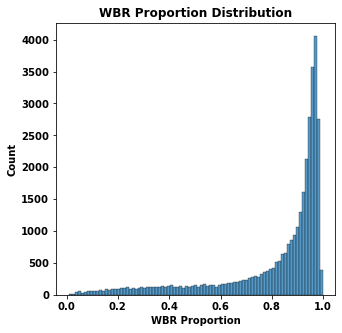

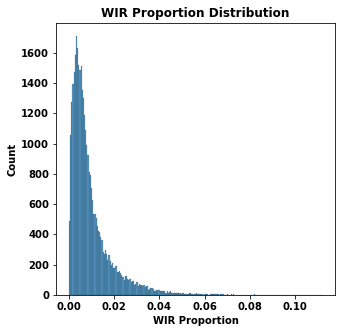

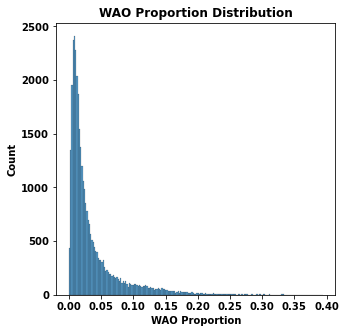

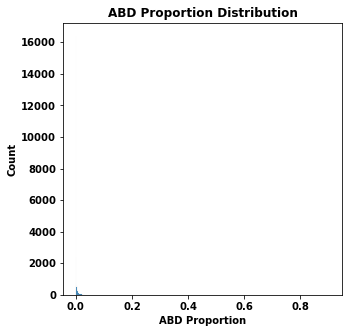

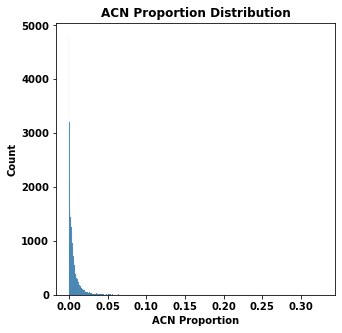

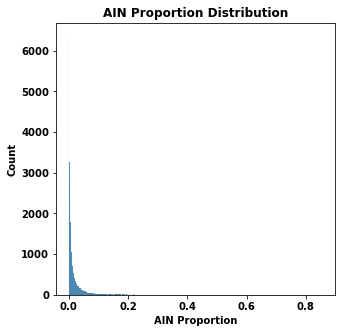

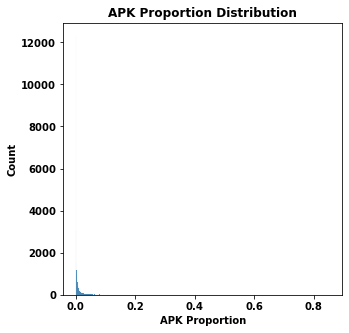

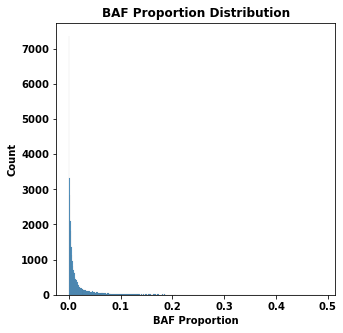

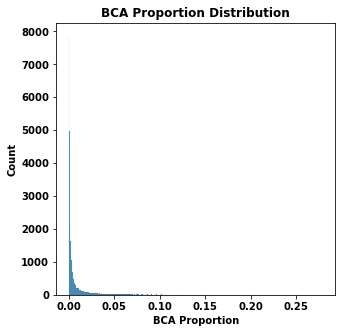

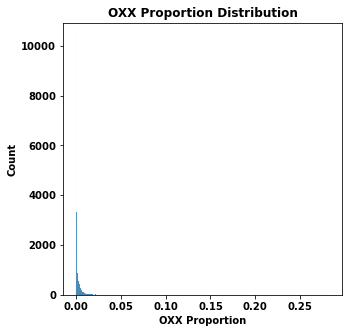

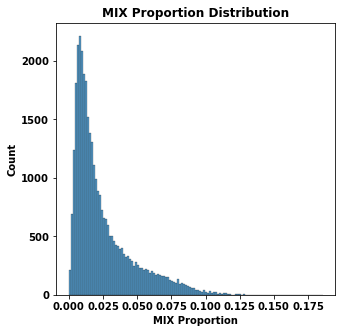

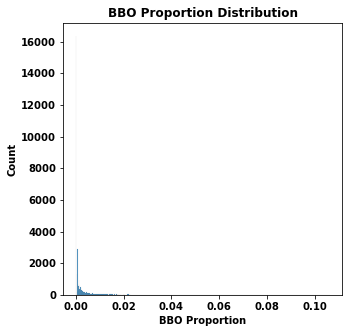

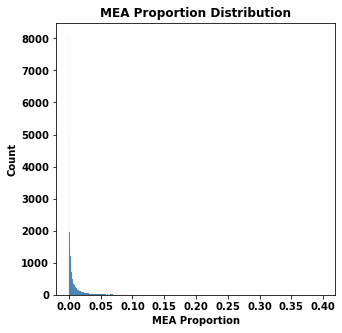

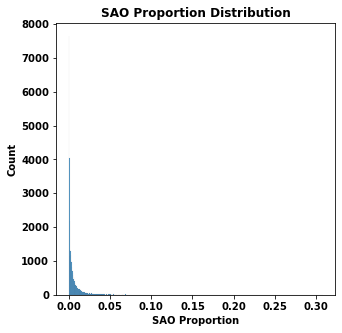

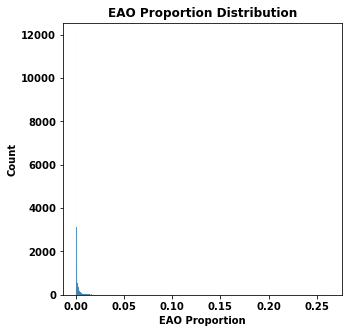

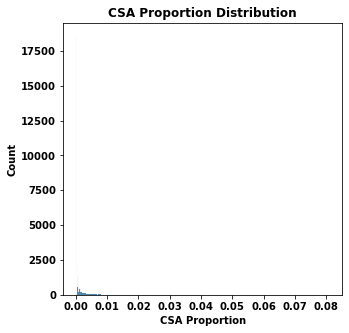

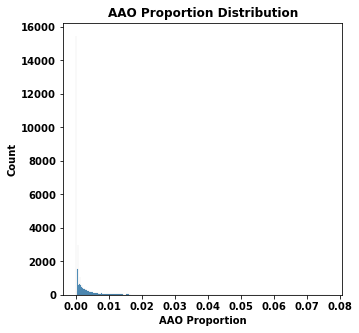

In [139]:
# Looking at histograms for each numeric column:
for column in df_ethnicity_numeric.columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(x=column, data=df_ethnicity)
    plt.title(f"{column} Distribution")
    plt.show()

We notice that most distributions are not normal and resemble a log function; something to keep in mind for feature engineering. There are also some columns that have very little variation.

We decided to use variance thresholder in order to identify which columns have so little variance that they will have no impact on our dependent variable, and will therefore need to be merged with other columns.

In [140]:
# Import the VarianceThresholder
from sklearn.feature_selection import VarianceThreshold

# Instantiate the VarianceThresholder, we need to set a threshold variance. We're setting it as 0.0004
my_vt = VarianceThreshold(threshold=0.0004)

# Fit to the data and calculate the variances per column
my_vt.fit(df_ethnicity_numeric)

VarianceThreshold(threshold=0.0004)

From here we can plot variances in a graph:

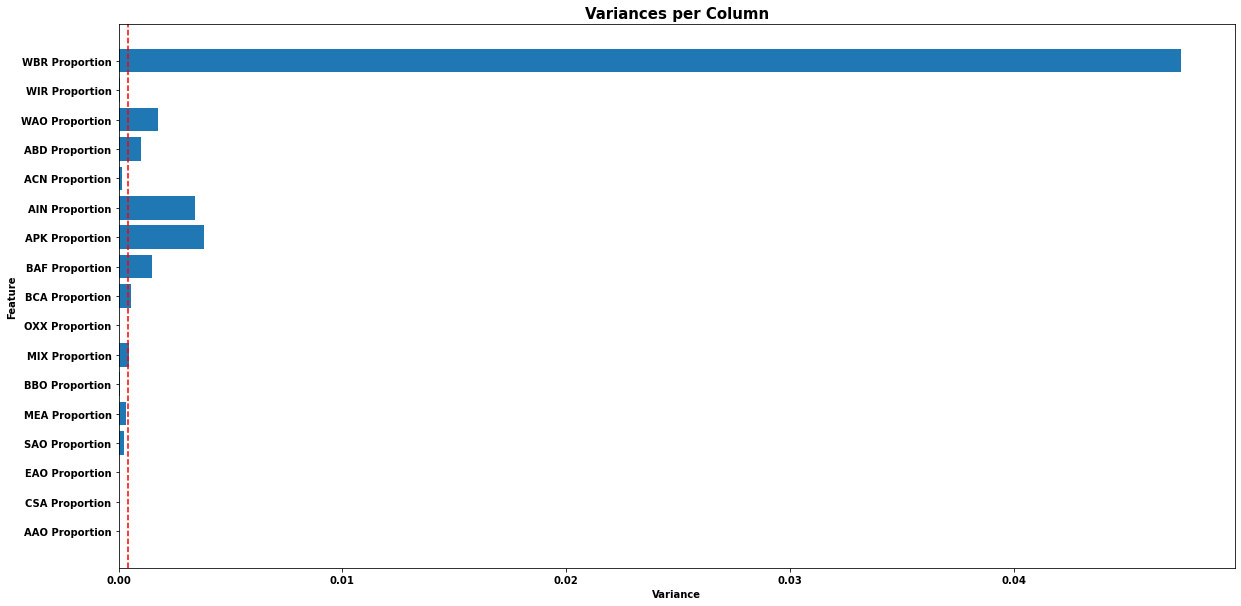

In [141]:
# Extract the variances per column
column_variances = my_vt.variances_

# Plot with the threshold
plt.figure(figsize=(20,10))
plt.barh(np.flip(df_ethnicity_numeric.columns), np.flip(column_variances))
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.axvline(0.0004, color='red', linestyle='--')
plt.title('Variances per Column', fontsize=15)
plt.show()

We can see that many columns do not make the cut. Let's see what we're left with:

In [142]:
# Get the columns which are retained, this returns an array of boolean values
my_vt.get_support()

array([ True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False])

In [143]:
# Let's see the names of retained columns 
df_ethnicity_numeric.columns[my_vt.get_support()]

Index(['WBR Proportion', 'WAO Proportion', 'ABD Proportion', 'AIN Proportion',
       'APK Proportion', 'BAF Proportion', 'BCA Proportion', 'MIX Proportion'],
      dtype='object')

This means that we will need to merge some columns that are outside of this line:

In [144]:
# Merging columns
df_ethnicity['WAO Proportion'] = df_ethnicity['WIR Proportion'] + df_ethnicity['WAO Proportion']

In [145]:
# Merging columns
df_ethnicity.drop(axis=0, columns='WIR Proportion', inplace=True)

In [146]:
# Merging columns
df_ethnicity['AAB Proportion'] = df_ethnicity['ACN Proportion'] + df_ethnicity['EAO Proportion'] + df_ethnicity['AAO Proportion'] + df_ethnicity['SAO Proportion']

In [147]:
# Merging columns
df_ethnicity.drop(axis=0, columns='ACN Proportion', inplace=True)

In [148]:
# Merging columns
df_ethnicity.drop(axis=0, columns='EAO Proportion', inplace=True)

In [149]:
# Merging columns
df_ethnicity.drop(axis=0, columns='AAO Proportion', inplace=True)

In [150]:
# Merging columns
df_ethnicity.drop(axis=0, columns='SAO Proportion', inplace=True)

In [151]:
# Merging columns
df_ethnicity['OXX Proportion'] = df_ethnicity['OXX Proportion'] + df_ethnicity['MEA Proportion'] + df_ethnicity['CSA Proportion'] + df_ethnicity['BBO Proportion']

Now we will drop some old columns that were merged:

In [152]:
# Dropping merged columns
df_ethnicity.drop(axis=0, columns='MEA Proportion', inplace=True)

In [153]:
# Dropping merged columns
df_ethnicity.drop(axis=0, columns='CSA Proportion', inplace=True)

In [154]:
# Dropping merged columns
df_ethnicity.drop(axis=0, columns='BBO Proportion', inplace=True)

Let's take a look now:

In [155]:
# Selecing numeric columns only in the new dataset
df_ethnicity_numeric = df_ethnicity[df_ethnicity.select_dtypes("number").columns].copy()

In [156]:
# Instantiate the VarianceThresholder, we need to set a threshold variance
my_vt = VarianceThreshold(threshold=0.0004)

# Fit to the data and calculate the variances per column
my_vt.fit(df_ethnicity_numeric)

VarianceThreshold(threshold=0.0004)

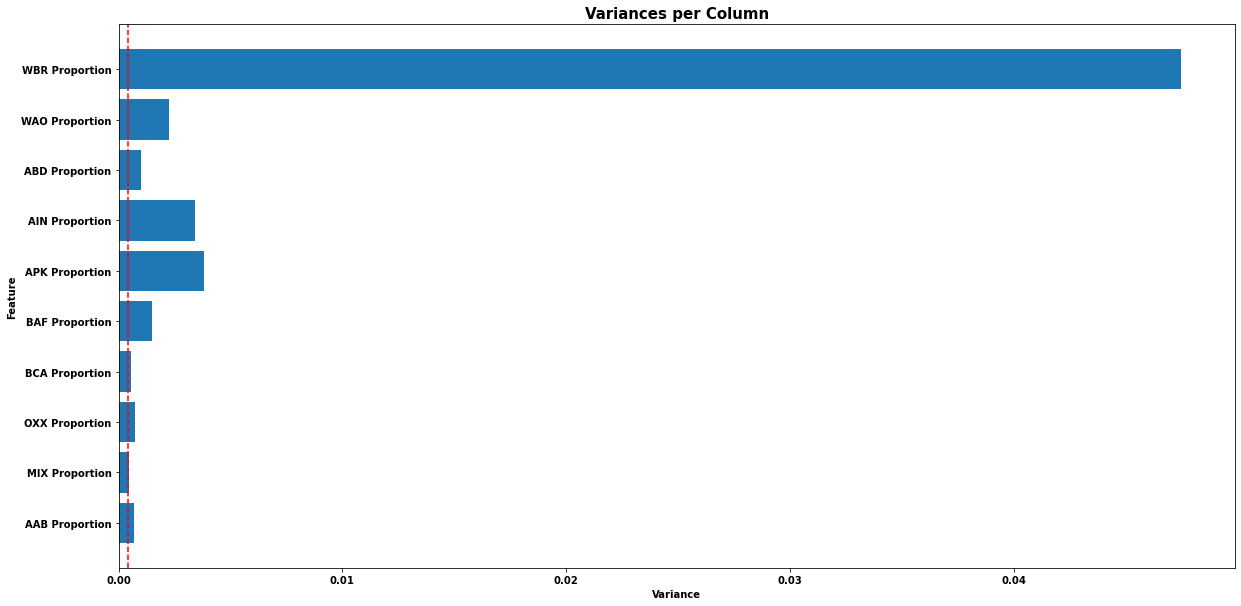

In [157]:
# Extract the variances per column
column_variances = my_vt.variances_

# Plot with the threshold
plt.figure(figsize=(20,10))
plt.barh(np.flip(df_ethnicity_numeric.columns), np.flip(column_variances))
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.axvline(0.0004, color='red', linestyle='--')
plt.title('Variances per Column', fontsize=15)
plt.show()

It is a bit hard to tell on the graph so let's look at the get_support feature of Threshold Variance:

In [158]:
# Get the columns which are retained
my_vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

This is great! Looks like all new columns are retained. Here's the legend for the final abbreviations:

Abbreviations:
    
* **WBR** - White: British (including English/Welsh/Scottish/Northern Irish)
* **WAO** - White: Any Other (including Irish)
* **ABD** - Asian/Asian British: Bangladeshi
* **AIN** - Asian/Asian British: Indian
* **APK** - Asian/Asian British: Pakistani
* **BAF** - Black/Black British: African
* **BCA** - Black/Black British: Caribbean
* **OXX** - Any Other Ethnic Group (All Other Ethnicities, Middle Eastern, Central & Sout America, etc)
* **MIX** - Mixed ethnicities
* **AAB** - Other Asian (East Asian, Chinese, etc.)

Now we're ready to merge with our main dataset:

In [159]:
# Merging on neighborhood code
df = df.merge(df_ethnicity, how='outer', left_on='LSOA code', right_on='LSOA Code')

Let's see if it worked:

In [160]:
# Taking a look at the first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,...,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,...,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,...,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,...,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542


In [161]:
# Checking the size
df.shape

(4052180, 32)

In [162]:
# Removing extra column
df.drop(axis=0, columns='LSOA Code', inplace=True)

Let's check if the merge introduced any nulls:

In [163]:
# Checking nulls
df.isna().sum()

Month                              4356
Police_Jurisdiction                4356
Longitude                          4356
Latitude                           4356
LSOA code                          4356
LSOA name                          4356
Crime type                         4356
Last outcome category              4356
Population                         4356
Proportion_Males                   4356
Proportion_0-15                    4356
Proportion_16-29                   4356
Proportion_30-44                   4356
Proportion_45-64                   4356
Proportion_65+                     4356
Proportion_0car_hhlds              4356
#_ppl_hhld                         4356
Deprivation_Index                  4356
Job_Seeker_Allowance_Proportion    4356
FSM11to15Proportion                4356
FSM5to10Proportion                 4356
WBR Proportion                        0
WAO Proportion                        0
ABD Proportion                        0
AIN Proportion                        0


These are relatively small values so we can safely drop them:

In [164]:
# Dropping nulls
df.dropna(inplace=True)

Finally let's check the column types:

In [165]:
# Checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047824 entries, 0 to 4047823
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Month                            float64
 1   Police_Jurisdiction              object 
 2   Longitude                        float64
 3   Latitude                         float64
 4   LSOA code                        object 
 5   LSOA name                        object 
 6   Crime type                       object 
 7   Last outcome category            object 
 8   Population                       float64
 9   Proportion_Males                 float64
 10  Proportion_0-15                  float64
 11  Proportion_16-29                 float64
 12  Proportion_30-44                 float64
 13  Proportion_45-64                 float64
 14  Proportion_65+                   float64
 15  Proportion_0car_hhlds            float64
 16  #_ppl_hhld                       float64
 17  Deprivat

Everything is how we expected so we can move on to the next dataset.

<a id='2h'></a>
### 2h) Population Density

First, let's import the CSV dataset into a dataframe: 

In [166]:
# Importing the dataset
df_density = pd.read_csv('data/sape23dt11mid2020lsoapopulationdensity.csv')

Then let's perform some basic checks:

In [167]:
# Take a look at the first 5 rows
df_density.head()

,LSOA Code,Mid-2020 population,Area Sq Km,People per Sq Km
0,E01011949,"1,944",0.52,"3,746"
1,E01011950,"1,298",0.13,"9,796"
2,E01011951,"1,208",0.21,"5,791"
3,E01011952,"1,724",0.46,"3,715"
4,E01011953,"2,026",0.88,"2,294"


In [168]:
# look at the size of the dataset
df_density.head()

,LSOA Code,Mid-2020 population,Area Sq Km,People per Sq Km
0,E01011949,"1,944",0.52,"3,746"
1,E01011950,"1,298",0.13,"9,796"
2,E01011951,"1,208",0.21,"5,791"
3,E01011952,"1,724",0.46,"3,715"
4,E01011953,"2,026",0.88,"2,294"


We can already see that:
* We will need to remove the comma and cast columns as floats
* Number of people per Square Km is already a relative number so can be left as is (we can rename it to be more intuitive)
* The Mid-2020 population column is a duplicate of our Population column in the main dataset

In [169]:
# Removing commas
df_density.replace(',','', regex=True, inplace=True)

In [170]:
# Dropping the duplicate column
df_density.drop(axis=0, columns='Mid-2020 population', inplace=True)

In [171]:
# Creating float type
df_density['People per Sq Km'] = df_density['People per Sq Km'].astype(float)

In [172]:
# Renaming the column
df_density.rename(inplace=True, columns={'People per Sq Km' : 'Population_Density'})

Now let's check if there are duplicates or nulls:

In [173]:
# Checking for duplicates
df_density.duplicated().sum()

0

In [174]:
# Checking for nulls
df_density.isnull().sum()

LSOA Code             0
Area Sq Km            0
Population_Density    0
dtype: int64

Now ready to merge!

In [175]:
# Merging on neighborhood code
df = df.merge(df_density, how='outer', left_on='LSOA code', right_on='LSOA Code')

Let's check what we have:

In [176]:
# Checking the size
df.shape

(4052180, 34)

In [177]:
# Checking the first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,...,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,LSOA Code,Area Sq Km,Population_Density
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,...,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,E01014399,4.12,524.0
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,E01014399,4.12,524.0
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,E01014399,4.12,524.0
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,...,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,E01014399,4.12,524.0
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,...,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,E01014399,4.12,524.0


Everything checks out, and the new columns were successfully added. Now we can drop the extra neighborhood column that we performed the merge on:

In [178]:
# Dropping the extra LSOA code
df.drop(axis=0, columns=['LSOA Code'], inplace=True)

Now let's check if the merge has introduced any new null values:

In [179]:
# Checking null values per column
df.isnull().sum()

Month                              4356
Police_Jurisdiction                4356
Longitude                          4356
Latitude                           4356
LSOA code                          4356
LSOA name                          4356
Crime type                         4356
Last outcome category              4356
Population                         4356
Proportion_Males                   4356
Proportion_0-15                    4356
Proportion_16-29                   4356
Proportion_30-44                   4356
Proportion_45-64                   4356
Proportion_65+                     4356
Proportion_0car_hhlds              4356
#_ppl_hhld                         4356
Deprivation_Index                  4356
Job_Seeker_Allowance_Proportion    4356
FSM11to15Proportion                4356
FSM5to10Proportion                 4356
WBR Proportion                     4356
WAO Proportion                     4356
ABD Proportion                     4356
AIN Proportion                     4356


There are some very small null values so we drop them:

In [180]:
# Dropping null values
df.dropna(inplace=True)

Finally let's check that all information is the right dtype:

In [181]:
# Checking the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047824 entries, 0 to 4047823
Data columns (total 33 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Month                            float64
 1   Police_Jurisdiction              object 
 2   Longitude                        float64
 3   Latitude                         float64
 4   LSOA code                        object 
 5   LSOA name                        object 
 6   Crime type                       object 
 7   Last outcome category            object 
 8   Population                       float64
 9   Proportion_Males                 float64
 10  Proportion_0-15                  float64
 11  Proportion_16-29                 float64
 12  Proportion_30-44                 float64
 13  Proportion_45-64                 float64
 14  Proportion_65+                   float64
 15  Proportion_0car_hhlds            float64
 16  #_ppl_hhld                       float64
 17  Deprivat

Everything checks out so we can move on to the next dataset.

<a id='2i'></a>
### 2i) Median House Price

First, let's import the CSV dataset into a dataframe: 

In [182]:
# Importing the dataset
df_house = pd.read_csv('data/hpssadataset46medianpricepaidforresidentialpropertiesbylsoa.csv')

Then let's perform some basic checks:

In [183]:
# Take a look at the first 5 rows
df_house.head()

,LSOA code,Year ending Dec 1995,Year ending Sep 2021,Unnamed: 3
0,E01011949,"34,750","81,500",NaN
1,E01011950,"25,000","50,159",NaN
2,E01011951,"27,000","58,574",NaN
3,E01011952,"44,500","84,000",NaN
4,E01011953,"22,000",:,NaN


In [184]:
# look at the size of the dataset
df_house.shape

(34856, 4)

Observations:

* Looks like we have two columns: one from 1995 and second from 2021
* Some rows have missing values denoted by a colon
* There is an extra unnamed column
* There are commas in the values columns

In [185]:
# First let's dropped the unnamed column
df_house.drop(axis=0, columns = 'Unnamed: 3', inplace=True)

Now let's remove the commas and colons:

In [186]:
# Replacing commas with nothing (i.e., removing them)
df_house.replace(',','', regex=True, inplace=True)

In [187]:
# Checking the number of colons in the first column
(df_house['Year ending Dec 1995'] == ":").sum()

1599

In [188]:
# Checking the number of colons in the second column
(df_house['Year ending Sep 2021'] == ":").sum()

899

These are fairly small numbers so we can safely drop these observations:

In [189]:
# Dropping rows that have colons
df_house.drop(df_house.index[df_house['Year ending Dec 1995'] == ":"], inplace=True)

In [190]:
# Dropping rows that have colons
df_house.drop(df_house.index[df_house['Year ending Sep 2021'] == ":"], inplace=True)

Now that the comma has been removed we can case the columns as floats:

In [191]:
# Changing dtype to float
df_house['Year ending Sep 2021'] = df_house['Year ending Sep 2021'].astype(float)

In [192]:
# Changing dtype to float
df_house['Year ending Dec 1995'] = df_house['Year ending Dec 1995'].astype(float)

We can also calculate the CAGR (Compound Annual Growth Rate) between 1995 and 2021 as an extra feature: 

In [193]:
# Creating a CAGR feature
df_house['Median_house_price_CAGR_1995-2021'] = (df_house['Year ending Sep 2021'] / df_house['Year ending Dec 1995'])**(1/26)-1

Now we can just keep the most recent median price, and drop the old price

In [194]:
# Renaming the column
df_house.rename(inplace=True, columns={'Year ending Sep 2021': 'Median_House_Price'})

In [195]:
# Dropping the column with old price
df_house.drop(axis=0, columns = 'Year ending Dec 1995', inplace=True)

We can also check for any nulls and duplicates:

In [196]:
# Checking for nulls
df_house.isnull().sum()

LSOA code                            103
Median_House_Price                   103
Median_house_price_CAGR_1995-2021    103
dtype: int64

There aren't that many so we can safely drop them:

In [197]:
# Dropping nulls
df_house.dropna(inplace=True)

In [198]:
# Checking for duplicates
df_house.duplicated().sum()

0

It's a small number so we can get rid of duplicates:

In [199]:
# Removing duplicates
df_house.drop_duplicates(inplace=True)

Now we're ready to merge with our main dataset:

In [200]:
# Merging on the neighborhood code
df = df.merge(df_house, how='outer', on='LSOA code')

The name of the column containing the neighborhood code was the same so no need to drop columns

Let's check what we have:

In [201]:
# Checking first five rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,...,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,...,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,...,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,...,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015


In [202]:
# Checking the size
df.shape

(4051546, 35)

Making sure we didn't introduce any null values:

In [203]:
# Checking for nulls
df.isnull().sum()

Month                                  3722
Police_Jurisdiction                    3722
Longitude                              3722
Latitude                               3722
LSOA code                                 0
LSOA name                              3722
Crime type                             3722
Last outcome category                  3722
Population                             3722
Proportion_Males                       3722
Proportion_0-15                        3722
Proportion_16-29                       3722
Proportion_30-44                       3722
Proportion_45-64                       3722
Proportion_65+                         3722
Proportion_0car_hhlds                  3722
#_ppl_hhld                             3722
Deprivation_Index                      3722
Job_Seeker_Allowance_Proportion        3722
FSM11to15Proportion                    3722
FSM5to10Proportion                     3722
WBR Proportion                         3722
WAO Proportion                  

Let's look at the proportion of nulls in terms of percentages:

In [204]:
print("The percentage of null rows: ", df.isnull().sum() / len(df_crime) * 100)

The percentage of null rows:  Month                                0.081253
Police_Jurisdiction                  0.081253
Longitude                            0.081253
Latitude                             0.081253
LSOA code                            0.000000
LSOA name                            0.081253
Crime type                           0.081253
Last outcome category                0.081253
Population                           0.081253
Proportion_Males                     0.081253
Proportion_0-15                      0.081253
Proportion_16-29                     0.081253
Proportion_30-44                     0.081253
Proportion_45-64                     0.081253
Proportion_65+                       0.081253
Proportion_0car_hhlds                0.081253
#_ppl_hhld                           0.081253
Deprivation_Index                    0.081253
Job_Seeker_Allowance_Proportion      0.081253
FSM11to15Proportion                  0.081253
FSM5to10Proportion                   0.081253
WBR 

While 6.8% is not an unsignificant number, we believe that our dataset is large enough that we can remove these values.

In [205]:
# Removing nulls
df.dropna(inplace=True)

Now we can move to the next dataset.

<a id='2j'></a>
### 2j) Median Age

First, let's import the CSV file into a Pandas dataframe:

In [206]:
# Importing the dataset
df_medianage = pd.read_csv('data/Median Age Population Estimate.csv')

Then let's perform some basic checks:

In [207]:
# Take a look at the first 5 rows
df_medianage.head()

,LSOA_CODE_2011,LSO11ANM,Median Age
0,E01020634,County Durham 001A,46.3
1,E01020635,County Durham 001B,47.5
2,E01020636,County Durham 001C,42.9
3,E01020654,County Durham 001D,44.9
4,E01020676,County Durham 001E,47.5


In [208]:
# look at the size of the dataset
df_medianage.shape

(34753, 3)

In [209]:
# Check dtypes
df_medianage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34753 entries, 0 to 34752
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LSOA_CODE_2011  34753 non-null  object 
 1   LSO11ANM        34753 non-null  object 
 2   Median Age      34753 non-null  float64
dtypes: float64(1), object(2)
memory usage: 814.6+ KB


Observations:

* No concerns with the column with the age, it's already denoted as a float
* Can drop the LSOA name column as it's a duplicate with our main dataset

In [210]:
# Dropping the duplicate column
df_medianage.drop(axis=0, columns='LSO11ANM', inplace=True)

Let's check for nulls and duplicates

In [211]:
# Checking nulls
df_medianage.isnull().sum()

LSOA_CODE_2011    0
Median Age        0
dtype: int64

In [212]:
# Checking duplicates
df_medianage.duplicated().sum()

0

This looks great, now we can move to the merging stage:

In [213]:
# Merging with the main dataset based on the neighborhood code
df = df.merge(df_medianage, how='outer', left_on='LSOA code', right_on='LSOA_CODE_2011')

In [214]:
# Dropping the extra code column
df.drop(axis=0, columns='LSOA_CODE_2011', inplace=True)

Checking the main dataset:

In [215]:
# Checking the size
df.shape

(3736323, 36)

In [216]:
# Checking the first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,...,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,...,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,...,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,...,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6


In [217]:
# Checking for nulls
df.isna().sum()

Month                                5879
Police_Jurisdiction                  5879
Longitude                            5879
Latitude                             5879
LSOA code                            5879
LSOA name                            5879
Crime type                           5879
Last outcome category                5879
Population                           5879
Proportion_Males                     5879
Proportion_0-15                      5879
Proportion_16-29                     5879
Proportion_30-44                     5879
Proportion_45-64                     5879
Proportion_65+                       5879
Proportion_0car_hhlds                5879
#_ppl_hhld                           5879
Deprivation_Index                    5879
Job_Seeker_Allowance_Proportion      5879
FSM11to15Proportion                  5879
FSM5to10Proportion                   5879
WBR Proportion                       5879
WAO Proportion                       5879
ABD Proportion                    

Relatively small values so we just drop them

In [218]:
# Dropping nulls
df.dropna(inplace=True)

Finally let's check that all information is the right dtype:

In [219]:
# Checking the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730444 entries, 0 to 3730443
Data columns (total 36 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Month                              float64
 1   Police_Jurisdiction                object 
 2   Longitude                          float64
 3   Latitude                           float64
 4   LSOA code                          object 
 5   LSOA name                          object 
 6   Crime type                         object 
 7   Last outcome category              object 
 8   Population                         float64
 9   Proportion_Males                   float64
 10  Proportion_0-15                    float64
 11  Proportion_16-29                   float64
 12  Proportion_30-44                   float64
 13  Proportion_45-64                   float64
 14  Proportion_65+                     float64
 15  Proportion_0car_hhlds              float64
 16  #_ppl_hhld        

Everything is good, now let's move to our last dataset.

<a id='2k'></a>
### 2k) Religion

First, let's import the CSV dataset into a dataframe: 

In [220]:
# Importing the dataset
df_religion = pd.read_csv('data/Religion.csv')

Then let's perform some basic checks:

In [221]:
# Take a look at the first 5 rows
df_religion.head()

,LSOA Code,LSOA Name,All categories: Religion,Religion: total,Christian,Buddhist,Hindu,Jewish,Muslim (Islam),Sikh,...,No religion: Total,No religion: No religion,No religion: Agnostic,No religion: Atheist,No religion: Free Thinker,No religion: Heavy Metal,No religion: Humanist,No religion: Jedi Knight,No religion: Realist,Religion not stated
0,E01020634,County Durham 001A,"1,563","1,148","1,140",1,0,1,2,0,...,336,331,1,1,0,0,2,1,0,79
1,E01020635,County Durham 001B,"1,379",945,938,2,0,0,0,0,...,350,346,1,0,0,0,1,2,0,84
2,E01020636,County Durham 001C,"1,698","1,237","1,223",4,3,0,5,0,...,355,350,0,1,0,0,0,4,0,106
3,E01020654,County Durham 001D,"1,746","1,320","1,312",4,0,1,0,0,...,328,322,0,0,0,0,2,4,0,98
4,E01020676,County Durham 001E,"1,514","1,105","1,090",2,0,1,3,0,...,317,308,0,0,0,0,0,9,0,92


In [222]:
# look at the size of the dataset
df_religion.shape

(34753, 62)

Observations:
* We see that there are commas in some columns
* `Religion: total` column refers to the number of people who are religious; we can safely assume that the difference with the total number of people are the non-religious people
* There are 60 different religious affiliations so we will group these into a dichotomous variable: religious or not for the purposes of our analysis (this will also help with comparisons)

Let's start by removing the comma and casting affected rows as integers:

In [223]:
# Removing the comma
df_religion.replace(',','', regex=True, inplace=True)

In [224]:
# Casting as integer 
df_religion['All categories: Religion'] = df_religion['All categories: Religion'].astype(int)

In [225]:
# Casting as integer 
df_religion['Religion: total'] = df_religion['Religion: total'].astype(int)

Now let's check for nulls and duplicates:

In [226]:
# Checking for nulls
df_religion.isnull().sum()

LSOA Code                   0
LSOA Name                   0
All categories: Religion    0
Religion: total             0
Christian                   0
                           ..
No religion: Heavy Metal    0
No religion: Humanist       0
No religion: Jedi Knight    0
No religion: Realist        0
Religion not stated         0
Length: 62, dtype: int64

In [227]:
# Checking for duplicates
df_religion.duplicated().sum()

0

Now let's calculate the proportion of Religious people:

In [228]:
# Calculation the proportion
df_religion['Proportion of Religious'] = df_religion['Religion: total'] / df_religion['All categories: Religion']

In [229]:
# Checking the first 5 rows
df_religion.head()

,LSOA Code,LSOA Name,All categories: Religion,Religion: total,Christian,Buddhist,Hindu,Jewish,Muslim (Islam),Sikh,...,No religion: No religion,No religion: Agnostic,No religion: Atheist,No religion: Free Thinker,No religion: Heavy Metal,No religion: Humanist,No religion: Jedi Knight,No religion: Realist,Religion not stated,Proportion of Religious
0,E01020634,County Durham 001A,1563,1148,1140,1,0,1,2,0,...,331,1,1,0,0,2,1,0,79,0.734485
1,E01020635,County Durham 001B,1379,945,938,2,0,0,0,0,...,346,1,0,0,0,1,2,0,84,0.685279
2,E01020636,County Durham 001C,1698,1237,1223,4,3,0,5,0,...,350,0,1,0,0,0,4,0,106,0.728504
3,E01020654,County Durham 001D,1746,1320,1312,4,0,1,0,0,...,322,0,0,0,0,2,4,0,98,0.756014
4,E01020676,County Durham 001E,1514,1105,1090,2,0,1,3,0,...,308,0,0,0,0,0,9,0,92,0.729855


We only need two columns from here: the LSOA Code to merge with the main dataset on, and the proportion of religious:

In [230]:
# Selecting only the needed columns
df_religion = df_religion.iloc[:, [0, 62]]

Sanity check:

In [231]:
# First column
df_religion.head(1)

,LSOA Code,Proportion of Religious
0,E01020634,0.734485


Now we're ready for the merge.

In [232]:
# Merging on the neighborhood code
df = df.merge(df_religion, how='outer', left_on='LSOA code', right_on='LSOA Code')

In [233]:
# Dropping the extra column
df.drop(axis=0, columns=['LSOA Code'], inplace=True)

Checking that everything went well:

In [234]:
# Checking the size
df.shape

(3736323, 37)

In [235]:
# Checking the first few rows
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,...,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,...,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,...,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,...,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,...,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754


Now let's check if the merge has introduced any new null values:

In [236]:
# Checking null values per column
df.isnull().sum()

Month                                5879
Police_Jurisdiction                  5879
Longitude                            5879
Latitude                             5879
LSOA code                            5879
LSOA name                            5879
Crime type                           5879
Last outcome category                5879
Population                           5879
Proportion_Males                     5879
Proportion_0-15                      5879
Proportion_16-29                     5879
Proportion_30-44                     5879
Proportion_45-64                     5879
Proportion_65+                       5879
Proportion_0car_hhlds                5879
#_ppl_hhld                           5879
Deprivation_Index                    5879
Job_Seeker_Allowance_Proportion      5879
FSM11to15Proportion                  5879
FSM5to10Proportion                   5879
WBR Proportion                       5879
WAO Proportion                       5879
ABD Proportion                    

There are some very small null values so we drop them:

In [237]:
# Dropping null values
df.dropna(inplace=True)

<a id='3'></a>
## 3) CSV Output

We have already performed the checks so we can just export the dataframe:

In [238]:
# Exporting the dataframe to a CSV file
df.to_csv(r'data\df_crime_EDA.csv', index=False)

### This is the end of Jupyter Notebook 2 (of 5). Please proceed to Jupyter Notebook 3.